In [1]:
%matplotlib notebook

In [2]:
%run dataset.py
%run funcs.py

In [5]:
import seaborn as sns
sns.set_style("darkgrid")
ax2 = sns.violinplot(x=avdataset['genre'],y=avdataset['handstrat'],hue=avdataset['sex'], 
                    split = True,inner="quart",palette='pastel', color_codes=True)

<IPython.core.display.Javascript object>


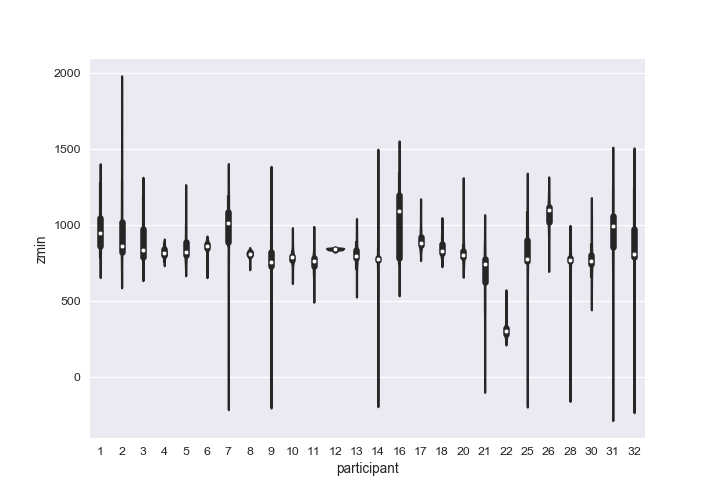

In [6]:
fig,ax = plt.subplots()
x = avdataset['participant']
y = avdataset['zmin']
sns.violinplot(x, y, lowess=True, color="g")

In [12]:
# for i in range(12,16):
#     pitches[i] = 2*pitches[i]

<IPython.core.display.Javascript object>


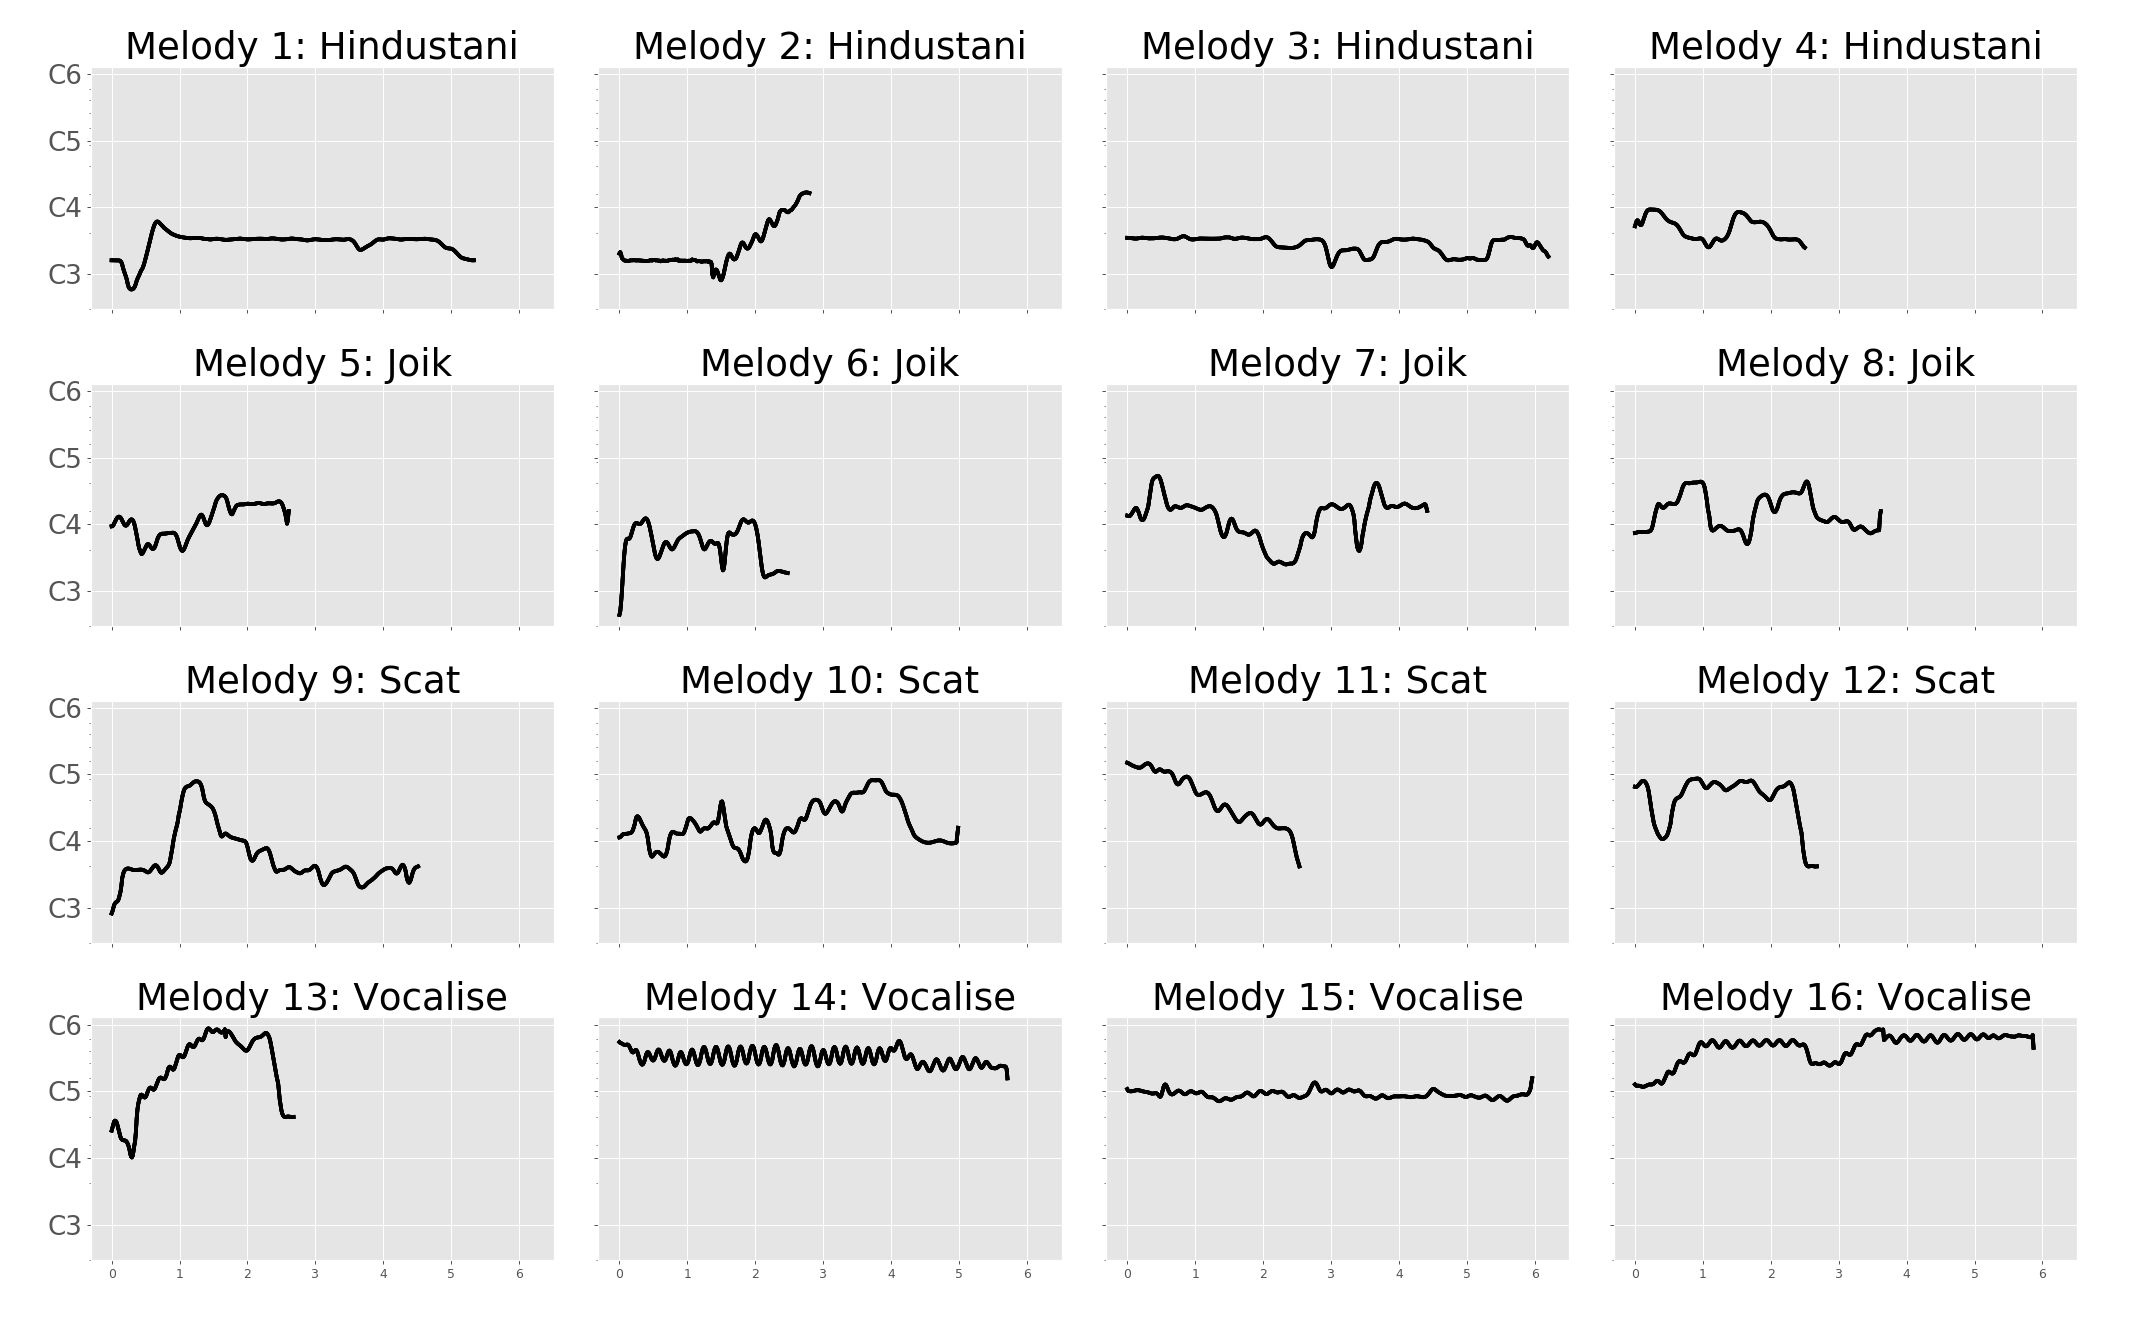

In [13]:
f, ax = plt.subplots(4,4,sharex=True,sharey=True,figsize = (24,15))
# f.suptitle("All Melodies in the Dataset", fontsize=20)
f.tight_layout(pad = 5,w_pad = 2, h_pad=5.0)
# f.subplots_adjust()
# f.text(0.4,0.0,'Time in Seconds', ha='center',fontsize='30')
# f.text(0.04, 0.3, 'Pitch Notation', va='center', rotation='vertical',fontsize='20')
for i in range(4):
    ax[0,0].plot(pitches[0],linewidth=3,color='black')
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([0,130,261,523,1046])
    ax[0,0].set_yticklabels(['0','C3','C4','C5','C6'],fontsize ='21')
    ax[0,0].set_xticks([0,84,168,252,336,420,504])
    ax[0,0].set_xticklabels(['0','1','2','3','4','5','6'],fontsize='21')
    ax[0,0].set_title('Melody 1: Hindustani',fontsize = '30')
    ax[0,1].plot(pitches[1],linewidth=3,color='black')
    ax[0,1].set_title('Melody 2: Hindustani',fontsize = '30')
    ax[0,2].plot(pitches[2],linewidth=3,color='black')
    ax[0,2].set_title('Melody 3: Hindustani',fontsize = '30')
    ax[0,3].plot(pitches[3],linewidth=3,color='black')
    ax[0,3].set_title('Melody 4: Hindustani',fontsize = '30')
    ax[1,0].plot(pitches[4],linewidth=3,color='black')
#     ax[1,0].set_ylabel('Pitch',fontsize = '30')
    ax[1,0].set_yticks([0,130,261,523,1046])
    ax[1,0].set_yticklabels(['0','C3','C4','C5','C6'],fontsize ='21')
    ax[1,0].set_title('Melody 5: Joik',fontsize = '30')
    ax[1,1].plot(pitches[5],linewidth=3,color='black')
    ax[1,1].set_title('Melody 6: Joik',fontsize = '30')
    ax[1,2].plot(pitches[6],linewidth=3,color='black')
    ax[1,2].set_title('Melody 7: Joik',fontsize = '30')
    ax[1,3].plot(pitches[7],linewidth=3,color='black')
    ax[1,3].set_title('Melody 8: Joik',fontsize = '30')
    ax[2,0].plot(pitches[8],linewidth=3,color='black')
#     ax[2,0].set_ylabel('Pitch',fontsize = '30')
    ax[2,0].set_yticks([0,130,261,523,1046])
    ax[2,0].set_yticklabels(['0','C3','C4','C5','C6'],fontsize ='21')
    ax[2,0].set_title('Melody 9: Scat',fontsize = '30')
    ax[2,1].plot(pitches[9],linewidth=3,color='black')
    ax[2,1].set_title('Melody 10: Scat',fontsize = '30')
    ax[2,2].plot(pitches[10],linewidth=3,color='black')
    ax[2,2].set_title('Melody 11: Scat',fontsize = '30')
    ax[2,3].plot(pitches[11],linewidth=3,color='black')
    ax[2,3].set_title('Melody 12: Scat',fontsize = '30')
    ax[3,0].plot(pitches[12],linewidth=3,color='black')
#     ax[3,0].set_ylabel('Pitch',fontsize = '30')
#     ax[3,0].set_xlabel('Time (s)',fontsize = '30')
    ax[3,0].set_yticks([0,130,261,523,1046])
    ax[3,0].set_yticklabels(['0','C3','C4','C5','C6'],fontsize ='21')
    ax[3,0].set_title('Melody 13: Vocalise',fontsize = '30')
    ax[3,1].plot(pitches[13],linewidth=3,color='black')
#     ax[3,1].set_xlabel('Time (s)',fontsize = '30')
    ax[3,1].set_title('Melody 14: Vocalise',fontsize = '30')
    ax[3,2].plot(pitches[14],linewidth=3,color='black')
#     ax[3,2].set_xlabel('Time (s)',fontsize = '30')
    ax[3,2].set_title('Melody 15: Vocalise',fontsize = '30')
    ax[3,3].plot(pitches[15],linewidth=3,color='black')
#     ax[3,3].set_xlabel('Time (s)',fontsize = '30')
    ax[3,3].set_title('Melody 16: Vocalise',fontsize = '30')

In [11]:
melodies['pitches'] = pitches

In [10]:
melodies['avs'] = numpy.zeros(len(melodies))
for i in range(len(melodies)):
    melodies['avs'][i] = numpy.mean(melodies['pitches'][i])
melodies

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,names,pitches,lengths,genre,maxes,avs
0,1,0 149.953407 1 149.944603 2 149...,0 0.023946 1 0.033946 2 0.04394...,im,224.687772,180.064499
1,2,0 160.888612 1 163.282015 2 159...,0 0.024966 1 0.034966 2 0.04496...,im,304.680644,178.391342
2,3,0 189.591800 1 189.584726 2 189...,0 0.023946 1 0.033946 2 0.04394...,im,192.831081,177.376435
3,4,0 214.205007 1 219.967193 2 225...,0 0.024966 1 0.034966 2 0.04496...,im,254.900062,209.737991
4,5,0 255.027198 1 255.324328 2 257...,0 0.964456 1 0.974456 2 0.98445...,jo,353.194610,275.419632
5,6,0 101.126622 1 104.858163 2 114...,0 0.024966 1 0.034966 2 0.04496...,jo,277.029698,214.985799
6,7,0 285.163078 1 284.540737 2 283...,0 0.074456 1 0.084456 2 0.09445...,jo,432.375911,283.211262
7,8,0 237.864488 1 238.262753 2 238...,0 0.024456 1 0.034456 2 0.04445...,jo,406.973907,298.945999
8,9,0 122.387140 1 125.206313 2 129...,0 1.023946 1 1.033946 2 1.04394...,sc,487.149358,230.527710
9,10,0 270.991061 1 271.594258 2 274...,0 0.123946 1 0.133946 2 0.14394...,sc,492.784120,319.501216


In [9]:
melodies['maxes'] = numpy.zeros(len(melodies))
for i in range(len(melodies)):
    melodies['maxes'][i] = numpy.max(melodies['pitches'][i])
melodies

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,names,pitches,lengths,genre,maxes
0,1,0 149.953407 1 149.944603 2 149...,0 0.023946 1 0.033946 2 0.04394...,im,224.687772
1,2,0 160.888612 1 163.282015 2 159...,0 0.024966 1 0.034966 2 0.04496...,im,304.680644
2,3,0 189.591800 1 189.584726 2 189...,0 0.023946 1 0.033946 2 0.04394...,im,192.831081
3,4,0 214.205007 1 219.967193 2 225...,0 0.024966 1 0.034966 2 0.04496...,im,254.900062
4,5,0 255.027198 1 255.324328 2 257...,0 0.964456 1 0.974456 2 0.98445...,jo,353.194610
5,6,0 101.126622 1 104.858163 2 114...,0 0.024966 1 0.034966 2 0.04496...,jo,277.029698
6,7,0 285.163078 1 284.540737 2 283...,0 0.074456 1 0.084456 2 0.09445...,jo,432.375911
7,8,0 237.864488 1 238.262753 2 238...,0 0.024456 1 0.034456 2 0.04445...,jo,406.973907
8,9,0 122.387140 1 125.206313 2 129...,0 1.023946 1 1.033946 2 1.04394...,sc,487.149358
9,10,0 270.991061 1 271.594258 2 274...,0 0.123946 1 0.133946 2 0.14394...,sc,492.784120


In [8]:
melodies['genre'] = ['im','im','im','im','jo','jo','jo','jo','sc','sc','sc','sc','vo','vo','vo','vo']

In [7]:
pitches = []
names = []
lengths = []
im = [1,2,3,4,17,18,19,20]
jo = [5,6,7,8,21,22,23,24]
sc = [9,10,11,12,25,26,27,28]
vo = [13,14,15,16,29,30,31,32]

for i in range(1,17,1):
    strings = str(i)+'.txt'
    pitches.append(readpitch(strings)['F0_Hz'])
    lengths.append(readpitch(strings)['Time_s'])
    names.append(str(i))        
    
cols = ['names','pitches','lengths']
    
melodies = pd.DataFrame(zip(names,pitches,lengths))
melodies.columns = cols

In [13]:
%run dataext.py

ValueError: Length mismatch: Expected axis has 7 elements, new values have 9 elements

In [14]:
# curve fit

import numpy as np
from scipy.optimize import leastsq

p0 = [0, 0, 0, 1]

def fitfunc(p, coords):
    x0, y0, z0, R = p
    x, y, z = coords.T
    return np.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)

errfunc = lambda p, x: fitfunc(p, x) - p[3]

coordinates = []
keys = []

for i in range(len(pieces)):
    coords = pd.DataFrame.as_matrix(getlhrh(pieces[i])['rh'])
    p1, flag = leastsq(errfunc, p0, args=(coords,))
    coordinates.append(p1)
    keys.append(int(i))

ValueError: Length mismatch: Expected axis has 7 elements, new values have 9 elements

In [17]:
# spline interpolation
from scipy.interpolate import splprep

coords = pd.DataFrame.as_matrix(getlhrhn(pieces[1])['rh'])

tck,u = splprep(x=coords[:,0], w=coords[:,1], u=coords[:,2], ub=None, ue=None, 
                           k=3, task=0, s=None, t=None, full_output=0, nest=None, per=0, quiet=1)


NameError: name 'getlhrhn' is not defined